In [3550]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import calendar
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
warnings.filterwarnings('ignore')

In [3551]:
#loading data
df=pd.read_csv(r'C:\Users\KIIT\Downloads\1804312.csv')
# df.head()

In [3552]:
df.shape

(50000, 19)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
business_code             50000 non-null object
cust_number               50000 non-null object
name_customer             50000 non-null object
clear_date                46187 non-null object
buisness_year             50000 non-null int64
doc_id                    50000 non-null int64
posting_date              50000 non-null object
document_create_date      50000 non-null int64
document_create_date.1    50000 non-null int64
due_in_date               50000 non-null int64
invoice_currency          50000 non-null object
document_type             50000 non-null object
posting_id                50000 non-null int64
area_business             0 non-null float64
total_open_amount         50000 non-null float64
baseline_create_date      50000 non-null int64
cust_payment_terms        50000 non-null object
invoice_id                49991 non-null float64
isOpen                    50000 non

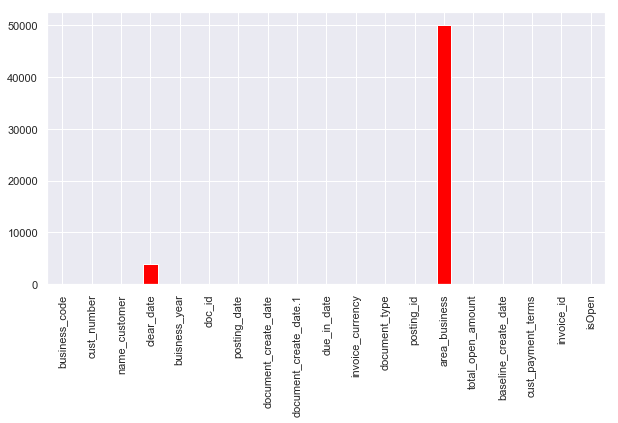

In [3553]:
#checking the null values in data
df.isnull().sum().plot(kind="bar",color='red',figsize=(10,5))
df.info()


In [3554]:
#as from above graph and info we can see that:
#1.area business is null
#2.clear date has some nulll values which we will use in our test set

In [3555]:
df.drop(columns="area_business",inplace=True)

In [3556]:
# df.dropna(subset=["invoice_id"],inplace=True)

business_code                 5
cust_number                1112
name_customer              4288
clear_date                  404
buisness_year                 2
doc_id                    50000
posting_date                502
document_create_date        504
document_create_date.1      502
due_in_date                 538
invoice_currency              2
document_type                 2
posting_id                    1
total_open_amount         45138
baseline_create_date        500
cust_payment_terms           73
invoice_id                49991
isOpen                        2
dtype: int64

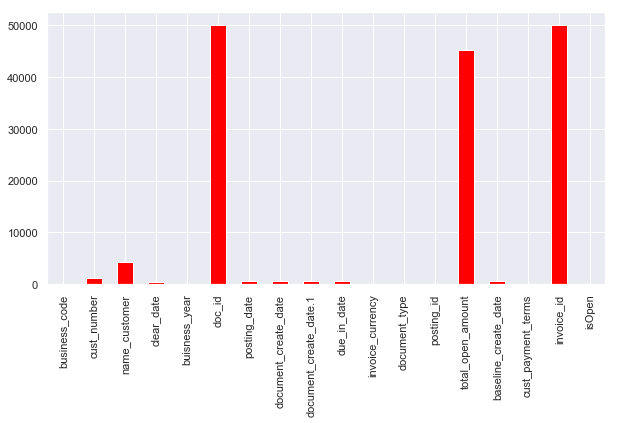

In [3557]:
df.nunique().plot(kind="bar",color='red',figsize=(10,5))#checking unique value
df.nunique()

In [3558]:
#here we can see docid and invoice id has all values unique which will not help us
#posting id has only one value which will not help us

In [3559]:
df.drop(columns=["posting_id","invoice_id","doc_id"],inplace=True)

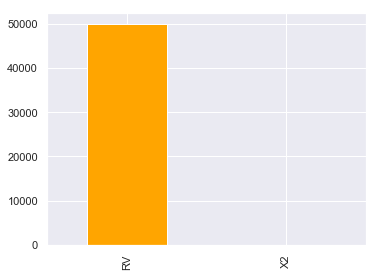

In [3560]:
df.document_type.value_counts().plot(kind="bar",color="orange")

In [3561]:
#as we can see from above graph and info that in document type approx all value is RV 
#so it will not help us

In [3562]:
df.drop(columns="document_type",inplace=True)

In [3563]:
#checking type of dates
type(df.document_create_date[0])

numpy.int64

In [3564]:
#so we can see that date values are not stored in date format
#so its better to change the datatype to date format

In [3565]:
df["clear_date"]=pd.to_datetime(df["clear_date"])
df["posting_date"]=pd.to_datetime(df["posting_date"])
df["document_create_date"]=pd.to_datetime(df["document_create_date"],format="%Y%m%d")
df["due_in_date"]=pd.to_datetime(df["due_in_date"],format="%Y%m%d")
df["baseline_create_date"]=pd.to_datetime(df["baseline_create_date"],format="%Y%m%d")
df["document_create_date.1"]=pd.to_datetime(df["document_create_date.1"],format="%Y%m%d")
df

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,200769623,WAL-MAR foundation,2019-01-15,2019,2019-05-01,2019-01-05,2019-01-05,2019-01-20,USD,756.28,2019-01-05,NAH4,0
1,U001,200726979,BJ'S trust,2019-08-27,2019,2019-10-08,2019-08-13,2019-08-10,2019-08-25,USD,126.87,2019-08-10,NAA8,0
2,U001,200794332,COST in,2019-05-21,2019,2019-08-05,2019-05-07,2019-05-08,2019-05-23,USD,30220.01,2019-05-08,NAAX,0
3,U001,200769623,WAL-MAR co,2019-10-09,2019,2019-08-25,2019-08-26,2019-08-25,2019-09-09,USD,64004.28,2019-08-25,NAH4,0
4,U001,100004536,BAS in,2019-04-04,2019,2019-03-21,2019-03-20,2019-03-21,2019-04-05,USD,82200.31,2019-03-21,NAA8,0
5,U001,200078795,H T H,2019-12-26,2019,2019-11-12,2019-12-11,2019-12-11,2019-12-26,USD,1459.63,2019-12-11,NAA8,0
6,U001,200769623,WAL-MAR,2019-11-27,2019,2019-11-17,2019-11-14,2019-11-17,2019-12-02,USD,15386.43,2019-11-17,NAH4,0
7,U001,200592182,DECA corp,2019-12-16,2019,2019-11-12,2019-12-11,2019-12-11,2019-12-24,USD,210.12,2019-12-01,NAM4,0
8,U001,200769623,WAL-MAR us,2020-04-02,2020,2020-01-24,2020-01-23,2020-01-24,2020-02-08,USD,36705.43,2020-01-24,NAH4,0
9,U001,200744019,TARG corporation,2019-02-05,2019,2019-02-21,2019-02-20,2019-02-21,2019-04-27,USD,5435.66,2019-02-21,NAGD,0


In [3566]:
df.shape#checking shape

(50000, 14)

In [3567]:
#as we have our amount in two type of currency so i am making it in only USD

In [3568]:
dict2={"CAD":0,"USD":1} #creating dictionary

In [3569]:
df["invoice_currency"]=df["invoice_currency"].map(dict2) #mapping dict.

In [3570]:
#converting CAD to USD

df.loc[df["invoice_currency"]==0,["total_open_amount"]]=0.78*df["total_open_amount"]
df

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,200769623,WAL-MAR foundation,2019-01-15,2019,2019-05-01,2019-01-05,2019-01-05,2019-01-20,1,756.2800,2019-01-05,NAH4,0
1,U001,200726979,BJ'S trust,2019-08-27,2019,2019-10-08,2019-08-13,2019-08-10,2019-08-25,1,126.8700,2019-08-10,NAA8,0
2,U001,200794332,COST in,2019-05-21,2019,2019-08-05,2019-05-07,2019-05-08,2019-05-23,1,30220.0100,2019-05-08,NAAX,0
3,U001,200769623,WAL-MAR co,2019-10-09,2019,2019-08-25,2019-08-26,2019-08-25,2019-09-09,1,64004.2800,2019-08-25,NAH4,0
4,U001,100004536,BAS in,2019-04-04,2019,2019-03-21,2019-03-20,2019-03-21,2019-04-05,1,82200.3100,2019-03-21,NAA8,0
5,U001,200078795,H T H,2019-12-26,2019,2019-11-12,2019-12-11,2019-12-11,2019-12-26,1,1459.6300,2019-12-11,NAA8,0
6,U001,200769623,WAL-MAR,2019-11-27,2019,2019-11-17,2019-11-14,2019-11-17,2019-12-02,1,15386.4300,2019-11-17,NAH4,0
7,U001,200592182,DECA corp,2019-12-16,2019,2019-11-12,2019-12-11,2019-12-11,2019-12-24,1,210.1200,2019-12-01,NAM4,0
8,U001,200769623,WAL-MAR us,2020-04-02,2020,2020-01-24,2020-01-23,2020-01-24,2020-02-08,1,36705.4300,2020-01-24,NAH4,0
9,U001,200744019,TARG corporation,2019-02-05,2019,2019-02-21,2019-02-20,2019-02-21,2019-04-27,1,5435.6600,2019-02-21,NAGD,0


In [3571]:
df.rename(columns={"total_open_amount":"total_open_amount_inUSD"})

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount_inUSD,baseline_create_date,cust_payment_terms,isOpen
0,U001,200769623,WAL-MAR foundation,2019-01-15,2019,2019-05-01,2019-01-05,2019-01-05,2019-01-20,1,756.2800,2019-01-05,NAH4,0
1,U001,200726979,BJ'S trust,2019-08-27,2019,2019-10-08,2019-08-13,2019-08-10,2019-08-25,1,126.8700,2019-08-10,NAA8,0
2,U001,200794332,COST in,2019-05-21,2019,2019-08-05,2019-05-07,2019-05-08,2019-05-23,1,30220.0100,2019-05-08,NAAX,0
3,U001,200769623,WAL-MAR co,2019-10-09,2019,2019-08-25,2019-08-26,2019-08-25,2019-09-09,1,64004.2800,2019-08-25,NAH4,0
4,U001,100004536,BAS in,2019-04-04,2019,2019-03-21,2019-03-20,2019-03-21,2019-04-05,1,82200.3100,2019-03-21,NAA8,0
5,U001,200078795,H T H,2019-12-26,2019,2019-11-12,2019-12-11,2019-12-11,2019-12-26,1,1459.6300,2019-12-11,NAA8,0
6,U001,200769623,WAL-MAR,2019-11-27,2019,2019-11-17,2019-11-14,2019-11-17,2019-12-02,1,15386.4300,2019-11-17,NAH4,0
7,U001,200592182,DECA corp,2019-12-16,2019,2019-11-12,2019-12-11,2019-12-11,2019-12-24,1,210.1200,2019-12-01,NAM4,0
8,U001,200769623,WAL-MAR us,2020-04-02,2020,2020-01-24,2020-01-23,2020-01-24,2020-02-08,1,36705.4300,2020-01-24,NAH4,0
9,U001,200744019,TARG corporation,2019-02-05,2019,2019-02-21,2019-02-20,2019-02-21,2019-04-27,1,5435.6600,2019-02-21,NAGD,0


In [3572]:
#dropping invoice currency columns becaus now our amount is in same currency
#so there is no use of it.

df.drop(columns="invoice_currency",inplace=True)

In [ ]:
#creating new column which tell about delays in date
df["delay_day"]=df["clear_date"]-df["due_in_date"]
df["delay_day"]=df["delay_day"].dt.days
df

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay_day
0,U001,200769623,WAL-MAR foundation,2019-01-15,2019,2019-05-01,2019-01-05,2019-01-05,2019-01-20,756.2800,2019-01-05,NAH4,0,-5.0
1,U001,200726979,BJ'S trust,2019-08-27,2019,2019-10-08,2019-08-13,2019-08-10,2019-08-25,126.8700,2019-08-10,NAA8,0,2.0
2,U001,200794332,COST in,2019-05-21,2019,2019-08-05,2019-05-07,2019-05-08,2019-05-23,30220.0100,2019-05-08,NAAX,0,-2.0
3,U001,200769623,WAL-MAR co,2019-10-09,2019,2019-08-25,2019-08-26,2019-08-25,2019-09-09,64004.2800,2019-08-25,NAH4,0,30.0
4,U001,100004536,BAS in,2019-04-04,2019,2019-03-21,2019-03-20,2019-03-21,2019-04-05,82200.3100,2019-03-21,NAA8,0,-1.0
5,U001,200078795,H T H,2019-12-26,2019,2019-11-12,2019-12-11,2019-12-11,2019-12-26,1459.6300,2019-12-11,NAA8,0,0.0
6,U001,200769623,WAL-MAR,2019-11-27,2019,2019-11-17,2019-11-14,2019-11-17,2019-12-02,15386.4300,2019-11-17,NAH4,0,-5.0
7,U001,200592182,DECA corp,2019-12-16,2019,2019-11-12,2019-12-11,2019-12-11,2019-12-24,210.1200,2019-12-01,NAM4,0,-8.0
8,U001,200769623,WAL-MAR us,2020-04-02,2020,2020-01-24,2020-01-23,2020-01-24,2020-02-08,36705.4300,2020-01-24,NAH4,0,54.0
9,U001,200744019,TARG corporation,2019-02-05,2019,2019-02-21,2019-02-20,2019-02-21,2019-04-27,5435.6600,2019-02-21,NAGD,0,-81.0


In [ ]:
#sorting our dataframe w.r.t document_create_date.1
df.sort_values("document_create_date.1",inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
#here i am creating a new feature 
#which will basically tell in how many days client has to clear invoice 

df["new_cust_payment_terms"]=df["due_in_date"]-df["baseline_create_date"]
df["new_cust_payment_terms"]=df["new_cust_payment_terms"].dt.days
df

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay_day,new_cust_payment_terms
0,U001,200726979,BJ'S,2019-01-15,2019,2018-12-30,2018-12-29,2018-12-30,2019-01-14,165.9000,2018-12-30,NAA8,0,1.0,15
1,U001,200744019,TARG corporation,2019-01-18,2019,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1372.0000,2018-12-30,NAA8,0,4.0,15
2,U001,200778998,CE,2019-11-01,2019,2018-12-30,2018-12-29,2018-12-30,2019-01-14,45620.8400,2018-12-30,NAA8,0,291.0,15
3,U001,200726979,BJ'S associates,2019-01-15,2019,2018-12-30,2018-12-29,2018-12-30,2019-01-14,576.0700,2018-12-30,NAA8,0,1.0,15
4,U001,200769623,WAL-MAR trust,2019-09-01,2019,2018-12-30,2018-12-30,2018-12-30,2019-01-14,59859.2400,2018-12-30,NAH4,0,230.0,15
5,U001,200726979,BJ'S corporation,2019-01-15,2019,2018-12-30,2018-12-29,2018-12-30,2019-01-14,142.7800,2018-12-30,NAA8,0,1.0,15
6,U001,200769623,WAL-MAR trust,2019-09-01,2019,2018-12-30,2018-12-29,2018-12-30,2019-01-14,16090.7800,2018-12-30,NAH4,0,230.0,15
7,U001,200769623,WAL-MAR foundation,2019-09-01,2019,2018-12-30,2018-12-29,2018-12-30,2019-01-14,44346.5600,2018-12-30,NAH4,0,230.0,15
8,U001,200769623,WAL-MAR corp,2019-09-01,2019,2018-12-30,2018-12-29,2018-12-30,2019-01-14,27817.0500,2018-12-30,NAH4,0,230.0,15
9,U001,200769623,WAL-MAR corporation,2019-01-14,2019,2018-12-30,2018-12-29,2018-12-30,2019-01-14,30710.9400,2018-12-30,NAH4,0,0.0,15


In [ ]:
# as we can see from here that posting_date and document_create_Date.1 is similar so i will drop posting_date
x=((df["posting_date"]-df["document_create_date.1"]).dt.days==0)
x.shape[0]

50000

In [ ]:
df.drop(columns="posting_date",inplace=True)

In [ ]:
#removing anomalies data!

In [ ]:
# condition:
# document_create_date/document_create_date.1 <= posting_date <= baseline_create_date <= due_in_date/clear_date
#posting date removed
def dropRows(colA, colB):
    print(colA,"--", colB, ": ", df[(df[colA] - df[colB]).dt.days < 0].shape[0])
    df.drop(df[(df[colA] - df[colB]).dt.days < 0].index, inplace = True)

lst = [['document_create_date', 'document_create_date.1'], ['baseline_create_date'], ['due_in_date', 'clear_date']]   
for i in range(len(lst)):
    for x in lst[i]:
        for j in lst[i+1:]:
            for y in j:
                dropRows(y, x)

print(df.shape)

baseline_create_date -- document_create_date :  5656
due_in_date -- document_create_date :  0
clear_date -- document_create_date :  6938
baseline_create_date -- document_create_date.1 :  0
due_in_date -- document_create_date.1 :  0
clear_date -- document_create_date.1 :  15
due_in_date -- baseline_create_date :  0
clear_date -- baseline_create_date :  5
(37386, 14)


In [ ]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay_day,new_cust_payment_terms
0,U001,200726979,BJ'S,2019-01-15,2019,2018-12-29,2018-12-30,2019-01-14,165.90,2018-12-30,NAA8,0,1.0,15
1,U001,200744019,TARG corporation,2019-01-18,2019,2018-12-30,2018-12-30,2019-01-14,1372.00,2018-12-30,NAA8,0,4.0,15
2,U001,200778998,CE,2019-11-01,2019,2018-12-29,2018-12-30,2019-01-14,45620.84,2018-12-30,NAA8,0,291.0,15
3,U001,200726979,BJ'S associates,2019-01-15,2019,2018-12-29,2018-12-30,2019-01-14,576.07,2018-12-30,NAA8,0,1.0,15
4,U001,200769623,WAL-MAR trust,2019-09-01,2019,2018-12-30,2018-12-30,2019-01-14,59859.24,2018-12-30,NAH4,0,230.0,15


In [ ]:
#dropping isOpen and business_year as it will not make any effect!
df.drop(columns=["isOpen","buisness_year"],inplace=True)

In [ ]:
#removing duplicate_rows

df.drop_duplicates(keep="first")

,business_code,cust_number,name_customer,clear_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay_day,new_cust_payment_terms
0,U001,200726979,BJ'S,2019-01-15,2018-12-29,2018-12-30,2019-01-14,165.9000,2018-12-30,NAA8,1.0,15
1,U001,200744019,TARG corporation,2019-01-18,2018-12-30,2018-12-30,2019-01-14,1372.0000,2018-12-30,NAA8,4.0,15
2,U001,200778998,CE,2019-11-01,2018-12-29,2018-12-30,2019-01-14,45620.8400,2018-12-30,NAA8,291.0,15
3,U001,200726979,BJ'S associates,2019-01-15,2018-12-29,2018-12-30,2019-01-14,576.0700,2018-12-30,NAA8,1.0,15
4,U001,200769623,WAL-MAR trust,2019-09-01,2018-12-30,2018-12-30,2019-01-14,59859.2400,2018-12-30,NAH4,230.0,15
5,U001,200726979,BJ'S corporation,2019-01-15,2018-12-29,2018-12-30,2019-01-14,142.7800,2018-12-30,NAA8,1.0,15
6,U001,200769623,WAL-MAR trust,2019-09-01,2018-12-29,2018-12-30,2019-01-14,16090.7800,2018-12-30,NAH4,230.0,15
7,U001,200769623,WAL-MAR foundation,2019-09-01,2018-12-29,2018-12-30,2019-01-14,44346.5600,2018-12-30,NAH4,230.0,15
8,U001,200769623,WAL-MAR corp,2019-09-01,2018-12-29,2018-12-30,2019-01-14,27817.0500,2018-12-30,NAH4,230.0,15
9,U001,200769623,WAL-MAR corporation,2019-01-14,2018-12-29,2018-12-30,2019-01-14,30710.9400,2018-12-30,NAH4,0.0,15


In [ ]:
#it is as function which will add the following features in our datasets after splitting
def addfeature(df):
    df["quarter"]=df.due_in_date.dt.quarter
    df["month"]=df.due_in_date.dt.month
    df["weekdays"]=df.due_in_date.dt.weekday
    
    
#it is a function which will encode(target encoding) the following features after splitting
def encoding(dF1, dF2, dF3, dF4):
    label1 = dF1.groupby(['business_code'])['delay_day'].mean().to_dict()
    dF1['business_code'] = dF1['business_code'].map(label1)
    dF2['business_code'] = dF2['business_code'].map(label1)
    dF2['business_code'] = dF2['business_code'].fillna(0)
    dF3['business_code'] = dF3['business_code'].map(label1)
    dF3['business_code'] = dF3['business_code'].fillna(0)
    dF4['business_code'] = dF4['business_code'].map(label1)
    dF4['business_code'] = dF4['business_code'].fillna(0)
    
    label2 = dF1.groupby(['cust_number'])['delay_day'].mean().to_dict()
    dF1['cust_number'] = dF1['cust_number'].map(label2)
    dF2['cust_number'] = dF2['cust_number'].map(label2)
    dF2['cust_number'] = dF2['cust_number'].fillna(0)
    dF3['cust_number'] = dF3['cust_number'].map(label2)
    dF3['cust_number'] = dF3['cust_number'].fillna(0)
    dF4['cust_number'] = dF4['cust_number'].map(label2)
    dF4['cust_number'] = dF4['cust_number'].fillna(0)
    
    label3 = dF1.groupby(['cust_payment_terms'])['delay_day'].mean().to_dict()
    dF1['cust_payment_terms'] = dF1['cust_payment_terms'].map(label3)
    dF2['cust_payment_terms'] = dF2['cust_payment_terms'].map(label3)
    dF2['cust_payment_terms'] = dF2['cust_payment_terms'].fillna(0)
    dF3['cust_payment_terms'] = dF3['cust_payment_terms'].map(label3)
    dF3['cust_payment_terms'] = dF3['cust_payment_terms'].fillna(0)
    dF4['cust_payment_terms'] = dF4['cust_payment_terms'].map(label3)
    dF4['cust_payment_terms'] = dF4['cust_payment_terms'].fillna(0)
    
    label4 = dF1.groupby(['name_customer'])['delay_day'].mean().to_dict()
    dF1['name_customer'] = dF1['name_customer'].map(label4)
    dF2['name_customer'] = dF2['name_customer'].map(label4)
    dF2['name_customer'] = dF2['name_customer'].fillna(0)
    dF3['name_customer'] = dF3['name_customer'].map(label4)
    dF3['name_customer'] = dF3['name_customer'].fillna(0)
    dF4['name_customer'] = dF4['name_customer'].map(label4)
    dF4['name_customer'] = dF4['name_customer'].fillna(0)
    

# SPLITTING

In [ ]:
#splitting the dataset on the basis of null values in clear_date

X_train=df.loc[df.clear_date.notnull()].copy()
X_test=df.loc[df.clear_date.isnull()].copy()

X_train.shape,X_test.shape

((34004, 12), (3382, 12))

In [ ]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay_day,new_cust_payment_terms
0,U001,200726979,BJ'S,2019-01-15,2018-12-29,2018-12-30,2019-01-14,165.90,2018-12-30,NAA8,1.0,15
1,U001,200744019,TARG corporation,2019-01-18,2018-12-30,2018-12-30,2019-01-14,1372.00,2018-12-30,NAA8,4.0,15
2,U001,200778998,CE,2019-11-01,2018-12-29,2018-12-30,2019-01-14,45620.84,2018-12-30,NAA8,291.0,15
3,U001,200726979,BJ'S associates,2019-01-15,2018-12-29,2018-12-30,2019-01-14,576.07,2018-12-30,NAA8,1.0,15
4,U001,200769623,WAL-MAR trust,2019-09-01,2018-12-30,2018-12-30,2019-01-14,59859.24,2018-12-30,NAH4,230.0,15


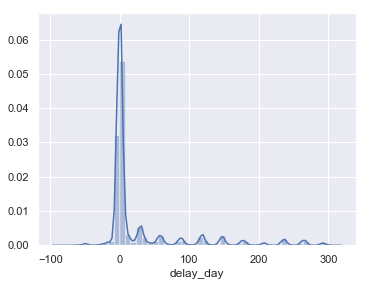

In [ ]:
#plotting distribution of delay day
#as we can see the plot is right skewed
sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.distplot(X_train.delay_day)

In [ ]:
#removing outliers
IQR = X_train['delay_day'].quantile(0.75) - X_train['delay_day'].quantile(0.25)
lower_boundary = X_train['delay_day'].quantile(0.25) - (IQR * 1.5)
upper_boundary = X_train['delay_day'].quantile(0.75) + (IQR * 1.5)
print(lower_boundary)
print(upper_boundary)

l = [x for x in range(int(lower_boundary), int(upper_boundary))]
X_train = X_train[X_train['delay_day'].isin(l)]
X_train.shape


-40.0
64.0


(28547, 12)

In [ ]:
#calculating length for val1 and val2

val1_len=int(0.70*len(X_train))
val2_len=int(0.90*len(X_train))
print(val1_len)




19982


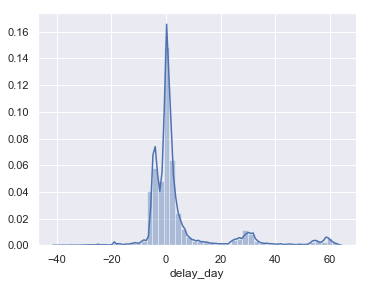

In [ ]:
#plotting distribution of delay day
sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.distplot(X_train.delay_day)

In [ ]:
#creating val1 and val2 

Y_train=X_train["delay_day"]

X_train_new=X_train.iloc[0:val1_len,:]
X_val1=X_train.iloc[val1_len:val2_len,:]
X_val2=X_train.iloc[val2_len:,:]



In [ ]:
#calling encoding function
encoding(X_train_new,X_val1,X_val2,X_test)

In [ ]:
#dropping the target column from train sets
X_train.drop(columns="delay_day",inplace=True)
X_train_new.drop(columns="delay_day",inplace=True)
X_val1.drop(columns="delay_day",inplace=True)
X_val2.drop(columns="delay_day",inplace=True)

In [ ]:
#creating Y_train,Y_val1,Y_val2
Y_train_new=Y_train.iloc[0:val1_len,]
Y_val1=Y_train.iloc[val1_len:val2_len,]
Y_val2=Y_train.iloc[val2_len:,]

In [ ]:
#calling add feature function
addfeature(X_train_new)
addfeature(X_val1)
addfeature(X_val2)
addfeature(X_test)

# EDA

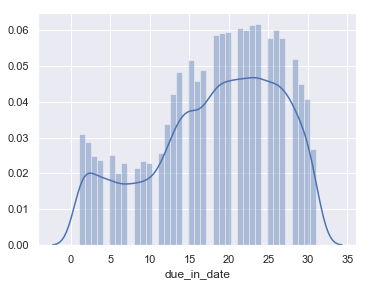

In [ ]:
#checking the distribution on the basis of due_in_date
sns.distplot(X_train["due_in_date"].dt.day)

In [ ]:
#checking the distribution on the basis of clear_date
sns.distplot(X_train["clear_date"].dt.day)

In [ ]:
#checking the distribution on due_date with daysofweek
sns.distplot(X_train["due_in_date"].dt.dayofweek)

In [ ]:
#checking the distribution on clear_Date_date with daysofweek
sns.distplot(X_train_new["clear_date"].dt.dayofweek)

In [ ]:
#checking the distribution on clear_Date_date with month
sns.distplot(X_train_new["due_in_date"].dt.month)

In [ ]:
#checking the distribution on clear_Date_date with month
sns.distplot(X_train_new["clear_date"].dt.month)

In [ ]:
#checking co-relation using heat map!

corr=X_train_new.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

In [ ]:
#as we can see month and quarter are highly co-related so its better to drop one of it!

In [ ]:
#dropping all the date columns

X_train_new.drop(columns=["clear_date","document_create_date","document_create_date.1","due_in_date","baseline_create_date"],inplace=True)
X_val1.drop(columns=["clear_date","document_create_date","document_create_date.1","due_in_date","baseline_create_date"],inplace=True)
X_val2.drop(columns=["clear_date","document_create_date","document_create_date.1","due_in_date","baseline_create_date"],inplace=True)

# Feature Selection

### Embedded

In [ ]:
# I am using embedded method for feature selection below are the functions related to it!

In [ ]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

In [ ]:
feature_importance=tree_based_feature_importance(X_train_new,Y_train_new)

In [ ]:
display(feature_importance)

In [ ]:
#taking only important features
X_train_new=X_train_new[['name_customer','total_open_amount','cust_number','month','weekdays']]
X_val1=X_val1[['name_customer','total_open_amount','cust_number','month','weekdays']]
X_val2=X_val2[['name_customer','total_open_amount','cust_number','month','weekdays']]
X_test=X_test[['name_customer','total_open_amount','cust_number','month','weekdays']]

In [ ]:
#scaling our datasets using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # create an object
X_train_scaled = scaler.fit_transform(X_train_new) # fit the scaler to the train set, and then transform it
X_val1_scaled = scaler.transform(X_val1) # transform the test set
X_val2_scaled=scaler.transform(X_val2) 
X_test_scaled=scaler.transform(X_test)

# Modeling

In [ ]:
MSE_Score = []
R2_Score = []
Algorithm = []

In [ ]:
#Linear Regression Model

Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train_scaled, Y_train_new)

# Predicting the Test Set Results
predicted = clf.predict(X_val1_scaled)

In [ ]:
MSE_Score.append(mean_squared_error(Y_val1, predicted))
R2_Score.append(r2_score(Y_val1, predicted))

In [ ]:
#Support Vector Regression


Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train_scaled, Y_train_new)

# Predicting the Test Set Results
predicted = clf.predict(X_val1_scaled)

In [ ]:
MSE_Score.append(mean_squared_error(Y_val1, predicted))
R2_Score.append(r2_score(Y_val1, predicted))

In [ ]:
#Random Forest Regressor
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train_scaled, Y_train_new)

# Predicting the Test Set Results
predicted = clf.predict(X_val1_scaled)

In [ ]:
MSE_Score.append(mean_squared_error(Y_val1, predicted))
R2_Score.append(r2_score(Y_val1, predicted))

In [ ]:
#Decision Tree Regressor

Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(X_train_scaled, Y_train_new)

# Predicting the Test Set Results
predicted = clf.predict(X_val1_scaled)

In [ ]:
MSE_Score.append(mean_squared_error(Y_val1, predicted))
R2_Score.append(r2_score(Y_val1, predicted))

In [ ]:
#XGB regressor

Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X_train_scaled, Y_train_new)

# Predicting the Test Set Results
predicted = clf.predict(X_val1_scaled)

In [ ]:
MSE_Score.append(mean_squared_error(Y_val1, predicted))
R2_Score.append(r2_score(Y_val1, predicted))

In [ ]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

#### Score without hyperparameter tuning

In [ ]:
Comparison

# HYPERPARAMETER TUNING

In [ ]:
MSE_Score = []
R2_Score = []
Algorithm = []

In [ ]:
#function to call LinearRegression model which is tuned

def LinearRegression1(X_val1_scaled,Y_val1):
    Algorithm.append('Linear Regression')
    clf = LinearRegression(fit_intercept=False,normalize=True, copy_X=True, n_jobs=None)
    clf.fit(X_train_scaled, Y_train_new)

    # Predicting the Test Set Results
    predicted = clf.predict(X_val1_scaled)
    MSE_Score.append(mean_squared_error(Y_val1, predicted))
    R2_Score.append(r2_score(Y_val1, predicted))

In [ ]:
#function to call SVR model which is tuned

def SVR1(X_val1_scaled,Y_val1):
    Algorithm.append('Support Vector Regression')
    clf =SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.015, C=1.0, epsilon=0.5,
              shrinking=False, cache_size=200, verbose=False, max_iter=- 1)

    clf.fit(X_train_scaled, Y_train_new)

    # Predicting the Test Set Results
    predicted = clf.predict(X_val1_scaled)
    MSE_Score.append(mean_squared_error(Y_val1, predicted))
    R2_Score.append(r2_score(Y_val1, predicted))

In [ ]:
#function to call RandomForest model which is tuned

def RandomForestRegressor1(X_val1_scaled,Y_val1):
    Algorithm.append('Random Forest Regressor')
    clf = RandomForestRegressor(n_estimators=100,criterion='mse', max_depth=4, min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
                                random_state=None, verbose=0, warm_start=False)
    clf.fit(X_train_scaled, Y_train_new)

    # Predicting the Test Set Results
    predicted = clf.predict(X_val1_scaled)
    MSE_Score.append(mean_squared_error(Y_val1, predicted))
    R2_Score.append(r2_score(Y_val1, predicted))

In [ ]:
#function to call DecisionTreeRegressor  model which is tuned


def DecisionTreeRegressor1(X_val1_scaled,Y_val1):
    Algorithm.append('Decision Tree Regressor')
    clf = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=5, min_samples_split=2, 
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                                random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None)
    clf.fit(X_train_scaled, Y_train_new)

    # Predicting the Test Set Results
    predicted = clf.predict(X_val1_scaled)
    MSE_Score.append(mean_squared_error(Y_val1, predicted))
    R2_Score.append(r2_score(Y_val1, predicted))

In [ ]:
#function to call XGB model which is tuned

def xgb1(X_val1_scaled,Y_val1):
    Algorithm.append('XGB Regressor')

    clf = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1.0, learning_rate = 0.05,
                    max_depth = 25, alpha = 70, n_estimators = 10)
    clf.fit(X_train_scaled, Y_train_new)

    # Predicting the Test Set Results
    predicted = clf.predict(X_val1_scaled)
    MSE_Score.append(mean_squared_error(Y_val1, predicted))
    R2_Score.append(r2_score(Y_val1, predicted))

##### Score After HyperParameter Tuning

In [ ]:
#checking score of  model on val1

LinearRegression1(X_val1_scaled,Y_val1)
SVR1(X_val1_scaled,Y_val1)
RandomForestRegressor1(X_val1_scaled,Y_val1)
DecisionTreeRegressor1(X_val1_scaled,Y_val1)
xgb1(X_val1_scaled,Y_val1)

Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

Comparison


In [ ]:
#### Score of tuned model on val2

In [ ]:
#checking score of  model on val2

MSE_Score = []
R2_Score = []
Algorithm = []


LinearRegression1(X_val2_scaled,Y_val2)
SVR1(X_val2_scaled,Y_val2)
RandomForestRegressor1(X_val2_scaled,Y_val2)
DecisionTreeRegressor1(X_val2_scaled,Y_val2)
xgb1(X_val2_scaled,Y_val2)

In [ ]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

Comparison

In [ ]:
#as i am getting xgb regressor as my best model
#so i will use xgb model for final predictiom

clf = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1.0, learning_rate = 0.05,
                    max_depth = 25, alpha = 70, n_estimators = 10)
clf.fit(X_train_scaled, Y_train_new)

    # Predicting the Test Set Results
predicted = clf.predict(X_test_scaled)

In [ ]:
predicted

In [ ]:
#taking round of predicted values
predicted=np.round(predicted).astype(int)

In [ ]:
#making new column on X_test which will contain predicted value
X_test["predicted_delay"]=predicted

In [ ]:
#creating bucket
l1=X_test["predicted_delay"].to_list()
l2=[]
for i in range(len(l1)):
    if(l1[i]<0):
        l2.append("<0 days")
    if(l1[i]>=0 and l1[i]<=15):
        l2.append("0-15 days")
    if(l1[i]>=16 and l1[i]<=45):
        l2.append("16-45 days")
    if(l1[i]>=46 and l1[i]<=60):
        l2.append("46-60 days")
    if(l1[i]>=61 and l1[i]<=75):
        l2.append("61-75 days")
    if(l1[i]>75):
        l2.append(">75 days")

In [ ]:
#appending bucket column in dataset
X_test["bucket"]=l2

In [ ]:
#creating new dataframe which contain only needed things!
X_test_final=X_test[["predicted_delay","bucket"]]

In [ ]:
X_test_final.head()
